<h2> Finding Correlations Between a Film's Descriptor Words and its Ratings, by Rob Frank</h2>

<p>
The central question is: *"Are there certain words in the description of films that are correlated with significantly higher or lower film ratings?"*
</p>

In accordance with the required specification to "analyze at least one dependent variable and three independent variables in your investigation," this project will examine the **dependent variable**:
* film ratings (as represented by the 'vote_average' column)

and its relationship with each of the following **independent variables**:
* the words used in the description of the film (from the 'overview' column) 
* the words used to describe the genre (from the 'genres' column) 
* the words used to identify the production companies involved (from the 'production_companies' column)

**The goal is to find words that are correlated with significantly higher or lower film ratings, for each of the independent variables**. After trying out several methods to achieve this goal, it appears that the most efficient way to do this is to create a dictionary of all of the words that are used to describe all of the films (from a single column), where each word in the dictionary acts as the key, and the value of each word is the list of ratings associated with that word. Using this dictionary, it is easy to find the mean rating of each word and then statistically test that sampling distribution against the population distribution, while making sure to ignore words that have a small sample size (only words that have at least 100 ratings are used). Finally, the results are converted to a dataframe in order to create visualizations. The Udacity Course on "Descriptive Statistics" was very helpful here, particularly the lesson on sampling distribution, and other outside sources were helpful as well, such as: https://onlinecourses.science.psu.edu/stat414/node/306

The target threshold means for the words were calculated using the following formula: 

<p><span style="font-size: 133%;">
$
\begin{equation*}
z = \frac{\large{(\bar{x} \text{ - } \mu)}} 
{\left(\Large{\frac {\sigma} {\sqrt{N}} }\right)}
\end{equation*}
$
</span></p>

<p><span style="font-size: 100%;">
$
\begin{equation*}
z = \text{z-score} \\
\bar{x} = \text{sample mean} \\ 
\mu = \text{population mean} \\
\sigma = \text{population standard deviation} \\
N = \text{sample size} \\
\end{equation*}
$
</span></p>

Using a sample size of at least 100 and a z-score of +/- 2.576 (for a confidence interval of 99%), the threshold mean will be:

<p><span style="font-size: 133%;">
$
\begin{equation*}
\bar{x} = \mu \pm 2.576 \left(\large{\frac{\sigma}{\sqrt{100}}}\right)
\end{equation*}
$
</span></p>

Applying this formula, it can be determined which words have means that are significantly above or significantly below the population mean. 

In order to make the proceeding analysis process as transparent and easy-to-follow as possible, each step is numbered and includes a brief explanation of the code cell that follows. 

In addition, the analysis presented in this project is meant to be highly exploratory in nature (rather than explanatory), and so it would be a mistake to imply any sort of causation between the variables. 

Finally, at the end of this project, there is summary of how all of the requirements of the grading rubric have been met. 

**Please Note**: Before embarking upon Udacity's Data Analyst Nanodegree Program, the only experience with Python that I had was what I learned in the recommended prerequisite Udacity course, "Intro to Computer Science." Prior to that, I did have some programming experience, but most of my career has centered around teaching college writing and test preparation courses. Therefore, any feedback that you provide will be greatly appreciated. Udacity's "Intro to Data Analysis" course was highly beneficial, but I felt compelled to go further here and learn more on my own about Python, Numpy, Pandas, Matplotlib, Seaborn, and Plotly (which I discovered because I wanted my visualizations to be more interactive). However, most of what I learned came from either the official documentation or Stackoverflow.com, and I am sure that there are many areas where my programming could be simpler, less redundant, or more eloquent, so again, I would appreciate any feedback that you might have. 

Thank you for your time and hope you enjoy! 


<h3>Step 1: Setup</h3>
* Load the csv file into a dataframe, main_df
* Set the dependent and independent variables (in this first case, the dependent variable will be the "vote_average" of the film, and the independent variable will be the description found in the "overview")
* Clean the data appropriately

In [1]:
import pandas as pd 
import numpy as np 

main_df = pd.read_csv('tmdb-movies.csv')

# set the variables
dependent_var = 'vote_average'
independent_var = 'overview'

# clean the independent variable column values by changing all of the words to lower case 
main_df[independent_var] = main_df[independent_var].str.lower()

# clean the independent variable column values by removing the em dash symbol 
main_df[independent_var] =  main_df[independent_var].str.replace('â€“',' ') 

main_df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  twenty-two years after the events of jurassic ...     124   
1  an apocalyptic story set in the furthest reach...     120   
2  beatrice prior must confront her inner demons ...     119   
3  thirty years after defeating the galactic empi...     136   
4  deckard shaw seeks revenge against dominic tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

<h3>Step 2: Check the dependent variable data distribution</h3>

* Graph the distribution of the dependent variable using a function 
  * Input the dataframe, the dependent variable, the start point of the x-axis, the end point of the x-axis, and the step-size of the x-axis 
* This step is important in order ensure that the dependent variable data has a normal distribution 

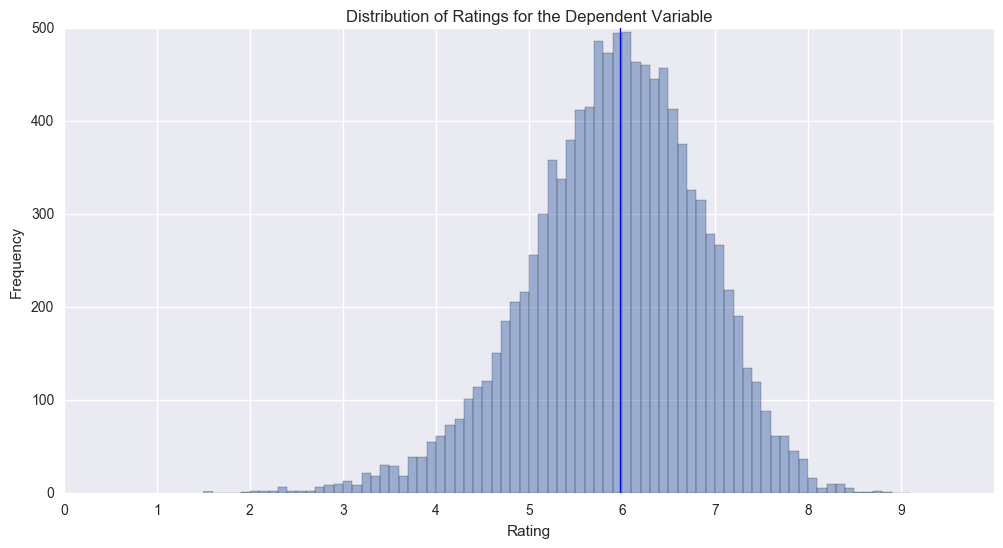

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def graph_dependent_variable_data(df, dependent_variable, start_graph_range, end_graph_range, step_size):
    plt.figure(figsize=(12,6))
    plt.ylabel("Frequency")
    plt.xlabel("Rating") 
    plt.title("Distribution of Ratings for the Dependent Variable")
    # set the x-axis based on the function inputs 
    plt.xticks(range(start_graph_range, end_graph_range))
    plt.xlim(start_graph_range, end_graph_range)
    bins = np.arange(start = df[dependent_variable].dropna().min(), 
                     stop = df[dependent_variable].dropna().max(), 
                     step = step_size)
    # drop the NaN values before
    plt.hist(df[dependent_variable].dropna(), bins=bins, alpha=.5)
    # create the mean line 
    plt.axvline(df[dependent_variable].mean(), linestyle='solid', linewidth=1)
    plt.show()
    
graph_dependent_variable_data(main_df, dependent_var, 0, 10, .1)


<h3>Step 3: Set the target means</h3>

* Set up a function that can be used for any dependent variable that is numeric (in this case, 'vote_average')
  * Calculate the mean and standard deviation of the 'vote_average' ratings for all film entries 
  * Calculate the upper and lower target means using the formula mentioned at the beginning of this project (again, the z-score is set at 2.576 and the sample size is set at 100 because only words with at least 100 ratings will be examined)
* Print the results 

In [3]:
def get_mean_std_and_targets(df, dependent_variable):
    # global variables are used here so that this function can easily be used for any dependent variable
    global all_entries_mean 
    all_entries_mean = df[dependent_variable].mean()
    global all_entries_std 
    all_entries_std = df[dependent_variable].std(ddof=0)
    global target_mean_high 
    target_mean_high = all_entries_mean + (2.576 * (all_entries_std / np.sqrt(100)))
    global target_mean_low 
    target_mean_low = all_entries_mean - (2.576 * (all_entries_std / np.sqrt(100)))
    
get_mean_std_and_targets(main_df, dependent_var)  

print 'Mean = ' , round(all_entries_mean, 2) 
print 'Standard Deviation = ' , round(all_entries_std, 2)
print 'Target mean (high) = ' , round(target_mean_high, 2) 
print 'Target mean (low) = ' , round(target_mean_low, 2)
    

Mean =  5.97
Standard Deviation =  0.94
Target mean (high) =  6.22
Target mean (low) =  5.73


<h3>Step 4: Create the dictionary</h3>
* Create an empty dictionary of lists 
* Go through each row of the dataframe, and for each row: 
  * Split the string found in the 'overview' column (the independent variable) into individual words 
  * For each word in the string, use the word as the key in the dictionary, and append the value of 'vote_average' (the dependent variable) to the list of ratings
* Timeit is used in order to show the speed of this method 

In [4]:
from collections import defaultdict

def create_dict(df, independent_variable, dependent_variable):
    # create the blank dictionary 
    new_dict = defaultdict(list) 
    # go through each row in the dataframe
    for index, row in df.iterrows():
        string_of_words = (row[independent_variable])
        # check to make sure the string isn't null 
        if not pd.isnull(string_of_words):
            # split the string into words
            words = string_of_words.split()
            for word in words:
                # append the rating of the film to the word's value in the dictionary 
                new_dict[word].append(row[dependent_variable])
    return new_dict

words_dict = create_dict(main_df, independent_var, dependent_var)

%timeit words_dict = create_dict(main_df, independent_var, dependent_var)


1 loop, best of 3: 13.1 s per loop


<h3>Step 5: Create the top words dataframe and the bottom words dataframe</h3>

* Using the previously created dictionary, create a dataframe that includes only the statistically significant words, where the words are the columns and there is a separate row for each rating, for each word 
  * The function works for either the top words or the bottom words, but not both, and this preference is chosen as an input
  * The function also uses the global variables that were set for the high and the low target means 
  * Only words with more than 100 associated ratings are evaluated, and all others are ignored
* The function is run separately for the top words and the bottom words
* Timeit is used in order to show the speed of this method 

In [5]:
def return_df(the_dict, top_or_bottom):
    # create the blank dataframe 
    words_df = pd.DataFrame()
    current_df_position = 0
    # go through the dictionary 
    for word, ratings_list in the_dict.iteritems():
        # only look at words that have over 100 associated ratings
        list_size = len(ratings_list)
        if list_size > 100:
            # only enter words into the dataframe if they are significant
            word_mean = np.mean(ratings_list)
            # first do the top words, if the input specified the top words 
            if (word_mean > target_mean_high) & (top_or_bottom == 'top'):
                # using the word as the column, enter each rating as a row into the dataframe 
                for rating in ratings_list:
                    words_df.loc[current_df_position,word] = rating
                    current_df_position += 1 
            else: 
                # now do the bottom words, if the input specified the bottom words
                if (word_mean < target_mean_low) & (top_or_bottom == 'bottom'):
                    # again, using the word as the column, enter each rating as a row into the dataframe 
                    for rating in ratings_list:
                        words_df.loc[current_df_position,word] = rating
                        current_df_position += 1 
    return(words_df)
    
top_words_df = return_df(words_dict,'top')
bottom_words_df = return_df(words_dict,'bottom')

%timeit top_words_df = return_df(words_dict,'top')
%timeit bottom_words_df = return_df(words_dict,'bottom')


1 loop, best of 3: 5.64 s per loop
1 loop, best of 3: 5.29 s per loop


<h3>Step 6: Show the top results </h3>

In [6]:
print ''
print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Top 99% CI = ' , np.round(target_mean_high,2)
print ''
print 'Mean Ratings For The Top Words:'
print ''

# sort the results descending 
top_words_df = top_words_df.reindex(top_words_df.mean().sort_values(ascending=False).index, axis=1)

print np.round(top_words_df.mean(),2)



Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22

Mean Ratings For The Top Words:

documentary    6.77
look           6.40
music          6.38
friendship     6.37
rock           6.35
director       6.35
we             6.33
drama          6.29
many           6.28
film           6.28
live           6.28
story          6.28
christmas      6.27
black          6.27
how            6.27
part           6.25
tells          6.25
always         6.25
made           6.23
form           6.22
true           6.22
london         6.22
book           6.22
dtype: float64


<h3>Analysis of Results:</h3>
* **Please Note**: These results are an excellent example of how this project is more exploratory than explanatory in nature -- purpose is not to explain but instead to intrigue
* 'documentary' is clearly the top word, and it is tempting to jump to conclusions about what this means, but there are many possible reasons for this (for example, maybe documentary films are better on the whole, or perhaps the people who watch and rate documentaries generally enjoy documentaries and people who don't enjoy documentaries are not likely to watch them) 
* It's interesting that several of the words describe films that tell a story (not only 'story' and 'tells', but also 'drama', 'true', and 'book' 
* It's also worth noting that in plot below, it's easy to see that some of the words have a much wider distribution than others (for example, 'rock' versus 'director')

<h3>Step 7: Show the distribution of the top results using Plotly</h3>

In [7]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
plotly.offline.init_notebook_mode(connected=True)

# Sort the top words dataframe so that the top word appears at the top of the legend 
top_words_df = top_words_df.reindex(top_words_df.mean().sort_values(ascending=True).index, axis=1)

# Drop the NaNs when creating the Distplot 
figure = ff.create_distplot([top_words_df[c].dropna() for c in top_words_df.columns[0:]], 
                            top_words_df.columns[0:], 
                            bin_size=.1, 
                            show_rug=False)

figure['layout'].update(title=
            '<b>Distribution of the Top Words</b> <br>(double-click a word on the right for its distribution)',
                        xaxis=dict(title='Rating'),
                        yaxis=dict(title='Relative Frequency'))

print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Top 99% CI = ' , np.round(target_mean_high,2)

plotly.offline.iplot(figure, filename='top words distplot')


Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22


<h3>Step 8: Show the bottom results</h3>

In [8]:
print ''
print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Bottom 99% CI = ' , np.round(target_mean_low,2)
print ''
print 'Mean Ratings For The Bottom Words:'
print ''

# sort the results ascending 
bottom_words_df = bottom_words_df.reindex(bottom_words_df.mean().sort_values(ascending=True).index, axis=1)

print np.round(bottom_words_df.mean(),2)



Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73

Mean Ratings For The Bottom Words:

terrifying    5.45
horror        5.48
ancient       5.50
deadly        5.56
island        5.58
group         5.58
realize       5.59
evil          5.60
trapped       5.62
stop          5.63
survive       5.63
earth         5.63
girls         5.65
rescue        5.67
killing       5.67
killer        5.68
college       5.68
something     5.69
alien         5.69
force         5.70
serial        5.70
control       5.71
within        5.71
discover      5.72
once          5.73
revenge       5.73
dtype: float64


<h3>Analysis of Results:</h3>
* There are a lot of words here that are related to horror films, though there are many possible reasons why this is so (for example, perhaps there are a lot of non-horror-fans who watch these films, or perhaps there are a lot of terrible horror films in existence because they often profitable even with a low budget) 
* It's also noteworthy that a lot of these words are violence-based, and again, it's impossible to tell if this is due to the tastes of the viewer or the quality of film 
* In the plot below, it's again interesting to see how certain words such as 'realize' have a much wider distribution than words such as 'serial' 

<h3>Step 9: Show the distribution of the bottom results using Plotly</h3>

In [9]:
# Sort the bottom words dataframe so that the bottom word appears at the top of the legend 
bottom_words_df = bottom_words_df.reindex(bottom_words_df.mean().sort_values(ascending=False).index, axis=1)

# Drop the NaNs when creating the Distplot 
figure = ff.create_distplot([bottom_words_df[c].dropna() for c in bottom_words_df.columns[0:]], 
                            bottom_words_df.columns[0:], 
                            bin_size=.1, 
                            show_rug=False)

figure['layout'].update(title=
            '<b>Distribution of the Bottom Words</b> <br>(double-click the word on the right for its distribution)',
                        xaxis=dict(title='Rating'),
                        yaxis=dict(title='Relative Frequency'))

print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Bottom 99% CI = ' , np.round(target_mean_low,2)

plotly.offline.iplot(figure, filename='top words distplot')


Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73


<h3>Step 10: Repeat steps 1 & 4-9, but for the independent variable of "genres"</h3>
* Copy-and-paste the code from those steps, but only the function calls, not the function definitions 
* Change the independent_var to 'genres'
* Add a data cleaning line in the beginning in order to eliminate the '|' separator 
* Turn steps 4 through 9 into a function 

In [10]:
###
### STEP 1 
###

main_df = pd.read_csv('tmdb-movies.csv')

# set the variables
dependent_var = 'vote_average'

### THIS IS THE ONLY LINE OF CODE THAT IS CHANGED 
independent_var = 'genres'

### THIS IS THE ONLY NEW LINE OF CODE ADDED
# clean the independent variable column values by eliminating the '|' separator
main_df[independent_var] =  main_df[independent_var].str.replace('|',' ') 

# clean the independent variable column values by changing all of the words to lower case 
main_df[independent_var] = main_df[independent_var].str.lower()

# clean the independent variable column values by removing the em dash symbol 
main_df[independent_var] =  main_df[independent_var].str.replace('â€“',' ') 

### THIS TURNS STEPS 4 THROUGH 9 INTO A FUNCTION
def show_results(main_df, independent_var):
    
    ###
    ### STEP 4
    ###
    words_dict = create_dict(main_df, independent_var, dependent_var)

    ###
    ### STEP 5 
    ### 

    top_words_df = return_df(words_dict,'top')
    bottom_words_df = return_df(words_dict,'bottom')

    ###
    ### STEP 6 
    ###

    print ''
    print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
    print 'Target Mean For The Top 99% CI = ' , np.round(target_mean_high,2)
    print ''
    print 'Mean Ratings For The Top Words:'
    print ''

    # sort the results descending 
    top_words_df = top_words_df.reindex(top_words_df.mean().sort_values(ascending=False).index, axis=1)

    print np.round(top_words_df.mean(),2)

    ###
    ### STEP 7
    ###

    # Sort the top words dataframe so that the top word appears at the top of the legend 
    top_words_df = top_words_df.reindex(top_words_df.mean().sort_values(ascending=True).index, axis=1)

    # Drop the NaNs when creating the Distplot 
    figure = ff.create_distplot([top_words_df[c].dropna() for c in top_words_df.columns[0:]], 
                                top_words_df.columns[0:], 
                                bin_size=.1, 
                                show_rug=False)

    figure['layout'].update(title=
                '<b>Distribution of the Top Words</b> <br>(double-click a word on the right for its distribution)',
                        xaxis=dict(title='Rating'),
                        yaxis=dict(title='Relative Frequency'))

    print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
    print 'Target Mean For The Top 99% CI = ' , np.round(target_mean_high,2)

    plotly.offline.iplot(figure, filename='top words distplot')

    ###
    ### STEP 8
    ### 

    print ''
    print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
    print 'Target Mean For The Bottom 99% CI = ' , np.round(target_mean_low,2)
    print ''
    print 'Mean Ratings For The Bottom Words:'
    print ''

    # sort the results ascending 
    bottom_words_df = bottom_words_df.reindex(bottom_words_df.mean().sort_values(ascending=True).index, axis=1)

    print np.round(bottom_words_df.mean(),2)

    ###
    ### STEP 9 
    ###

    # Sort the bottom words dataframe so that the bottom word appears at the top of the legend 
    bottom_words_df = bottom_words_df.reindex(bottom_words_df.mean().sort_values(ascending=False).index, axis=1)

    # Drop the NaNs when creating the Distplot 
    figure = ff.create_distplot([bottom_words_df[c].dropna() for c in bottom_words_df.columns[0:]], 
                                bottom_words_df.columns[0:], 
                                bin_size=.1, 
                                show_rug=False)

    figure['layout'].update(title=
                '<b>Distribution of the Bottom Words</b> <br>(double-click a word on the right for its distribution)',
                        xaxis=dict(title='Rating'),
                        yaxis=dict(title='Relative Frequency'))

    print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
    print 'Target Mean For The Bottom 99% CI = ' , np.round(target_mean_low,2)

    plotly.offline.iplot(figure, filename='top words distplot')
    
show_results(main_df, independent_var)



Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22

Mean Ratings For The Top Words:

documentary    6.91
music          6.48
history        6.41
animation      6.40
war            6.30
dtype: float64
Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22



Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73

Mean Ratings For The Bottom Words:

horror     5.34
fiction    5.67
science    5.67
dtype: float64
Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73


<h3>Analysis of Results:</h3> 
* It's not surprising that the genre of 'documentary' is at the top again, nor is it surprising that 'horror' is at the bottom 
* It's also not surprising that the distribution plot of 'science' overlaps with the plot of 'fiction'

<h3>Step 11: Repeat steps 1 & 4-9, but for the independent variable of "production_companies"</h3> 
* Change the independent_var to 'production_companies'
* Keep the data same cleaning 
* Use the function from Step 10 to run Steps 4 through 9

In [11]:
main_df = pd.read_csv('tmdb-movies.csv')

# set the variables
dependent_var = 'vote_average'

### THIS IS THE ONLY LINE OF CODE THAT IS CHANGED 
independent_var = 'production_companies'

# clean the independent variable column values by eliminating the '|' separator
main_df[independent_var] =  main_df[independent_var].str.replace('|',' ') 

# clean the independent variable column values by changing all of the words to lower case 
main_df[independent_var] = main_df[independent_var].str.lower()

# clean the independent variable column values by removing the em dash symbol 
main_df[independent_var] =  main_df[independent_var].str.replace('â€“',' ') 

# this is the function from Step 10 
show_results(main_df, independent_var)



Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22

Mean Ratings For The Top Words:

animation     6.43
bbc           6.40
dreamworks    6.30
canal+        6.30
miramax       6.25
walt          6.23
dtype: float64
Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22



Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73

Mean Ratings For The Bottom Words:

group    5.72
dtype: float64
Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73


<h3>Analysis of Results</h3>
* The distribution curve for 'dreamworks' is noticeably sharp and centered compared to the others 
* The problem with these results is that words such as 'dreamworks' clearly represent a single company, while other words such as 'group' represent a variety of companies -- therefore, it might be better to break up the string differently for this independent variable

<h3>Step 12: BONUS! Look for the top and bottom rated directors</h3>
* __Please Note:__ The sample size is greatly lowered (to > 8), so the results may not be statistically significant here
* Copy-and-paste all code from steps 1 & 4-9, including the function definitions
* Change the independent_var to 'director'
* In order to keep the directors' full names, change the create_dict function so that the strings are not split
* Change the minimum sample size in the return_df function to 8

In [12]:
###
### STEP 1 
###

main_df = pd.read_csv('tmdb-movies.csv')

# set the variables
dependent_var = 'vote_average'
independent_var = 'director'

# clean the independent variable column values by eliminating the '|' separator
main_df[independent_var] =  main_df[independent_var].str.replace('|',' ') 

# clean the independent variable column values by changing all of the words to lower case 
main_df[independent_var] = main_df[independent_var].str.lower()

# clean the independent variable column values by removing the em dash symbol 
main_df[independent_var] =  main_df[independent_var].str.replace('â€“',' ') 

###
### STEP 4
###

def create_dict(df, independent_variable, dependent_variable):
    # create the blank dictionary 
    new_dict = defaultdict(list) 
    # go through each row in the dataframe
    for index, row in df.iterrows():
        string_of_words = (row[independent_variable])
        # check to make sure the string isn't null 
        if not pd.isnull(string_of_words):
            ### DONT split the string into words
            new_dict[string_of_words].append(row[dependent_variable])
    return new_dict

words_dict = create_dict(main_df, independent_var, dependent_var)

### 
### STEP 5 
###

def return_df(the_dict, top_or_bottom):
    # create the blank dataframe 
    words_df = pd.DataFrame()
    current_df_position = 0
    # go through the dictionary 
    for word, ratings_list in the_dict.iteritems():
        list_size = len(ratings_list)
        ### THE SAMPLE SIZE IS NOW >8
        if list_size > 8:
            # only enter words into the dataframe if they are significant
            word_mean = np.mean(ratings_list)
            # first do the top words, if the input specified the top words 
            if (word_mean > target_mean_high) & (top_or_bottom == 'top'):
                # using the word as the column, enter each rating as a row into the dataframe 
                for rating in ratings_list:
                    words_df.loc[current_df_position,word] = rating
                    current_df_position += 1 
            else: 
                # now do the bottom words, if the input specified the bottom words
                if (word_mean < target_mean_low) & (top_or_bottom == 'bottom'):
                    # again, using the word as the column, enter each rating as a row into the dataframe 
                    for rating in ratings_list:
                        words_df.loc[current_df_position,word] = rating
                        current_df_position += 1 
    return(words_df)
    
top_words_df = return_df(words_dict,'top')
bottom_words_df = return_df(words_dict,'bottom')

###
### STEP 6 
### 

print ''
print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Top 99% CI = ' , np.round(target_mean_high,2)
print ''
print 'Mean Ratings For The Top Words:'
print ''

# sort the results descending 
top_words_df = top_words_df.reindex(top_words_df.mean().sort_values(ascending=False).index, axis=1)

print np.round(top_words_df.mean(),2)

###
### STEP 7
###

# Sort the top words dataframe so that the top word appears at the top of the legend 
top_words_df = top_words_df.reindex(top_words_df.mean().sort_values(ascending=True).index, axis=1)

# Drop the NaNs when creating the Distplot 
figure = ff.create_distplot([top_words_df[c].dropna() for c in top_words_df.columns[0:]], 
                            top_words_df.columns[0:], 
                            bin_size=.1, 
                            show_rug=False)

figure['layout'].update(title=
            '<b>Distribution of the Top Words</b> <br>(double-click a word on the right for its distribution)',
                        xaxis=dict(title='Rating'),
                        yaxis=dict(title='Relative Frequency'))

print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Top 99% CI = ' , np.round(target_mean_high,2)

plotly.offline.iplot(figure, filename='top words distplot')

###
### STEP 8
### 

print ''
print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Bottom 99% CI = ' , np.round(target_mean_low,2)
print ''
print 'Mean Ratings For The Bottom Words:'
print ''

# sort the results ascending 
bottom_words_df = bottom_words_df.reindex(bottom_words_df.mean().sort_values(ascending=True).index, axis=1)

print np.round(bottom_words_df.mean(),2)

###
### STEP 9 
###

# Sort the bottom words dataframe so that the bottom word appears at the top of the legend 
bottom_words_df = bottom_words_df.reindex(bottom_words_df.mean().sort_values(ascending=False).index, axis=1)

# Drop the NaNs when creating the Distplot 
figure = ff.create_distplot([bottom_words_df[c].dropna() for c in bottom_words_df.columns[0:]], 
                            bottom_words_df.columns[0:], 
                            bin_size=.1, 
                            show_rug=False)

figure['layout'].update(title=
            '<b>Distribution of the Bottom Words</b> <br>(double-click a word on the right for its distribution)',
                        xaxis=dict(title='Rating'),
                        yaxis=dict(title='Relative Frequency'))

print 'Mean Rating For All Of The Films = ' , np.round(all_entries_mean,2)
print 'Target Mean For The Bottom 99% CI = ' , np.round(target_mean_low,2)

plotly.offline.iplot(figure, filename='top words distplot')



Mean Rating For All Of The Films =  5.97
Target Mean For The Top 99% CI =  6.22

Mean Ratings For The Top Words:

christopher nolan       7.47
stanley kubrick         7.39
quentin tarantino       7.35
wes anderson            7.22
david fincher           7.21
joel coen               7.06
peter jackson           7.00
martin scorsese         6.96
danny boyle             6.89
jim jarmusch            6.85
james cameron           6.83
steven spielberg        6.82
roman polanski          6.79
richard attenborough    6.71
robert zemeckis         6.71
sam peckinpah           6.69
lasse hallstrÃ¶m        6.68
sidney lumet            6.68
richard linklater       6.68
werner herzog           6.66
alan parker             6.66
tim burton              6.64
peter weir              6.64
billy wilder            6.62
francis ford coppola    6.62
david lynch             6.59
antoine fuqua           6.58
kenneth branagh         6.57
jonathan demme          6.53
edward zwick            6.53
               

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



Mean Rating For All Of The Films =  5.97
Target Mean For The Bottom 99% CI =  5.73

Mean Ratings For The Bottom Words:

uwe boll                         4.09
roel reinÃ©                      4.78
stuart gillard                   4.95
brian levant                     5.23
brian robbins                    5.33
tobe hooper                      5.37
paul hoen                        5.41
raja gosnell                     5.43
peter hewitt                     5.50
paul schrader                    5.51
roger spottiswoode               5.54
robert rodriguez                 5.54
dwight h. little                 5.56
neil labute                      5.58
rob cohen                        5.58
russell mulcahy                  5.59
peter hyams                      5.59
bobby farrelly peter farrelly    5.59
j. lee thompson                  5.60
sean mcnamara                    5.63
john stockwell                   5.64
steve miner                      5.65
dennis dugan                     5.68
stuar

<h3>Analysis of Results</h3> 
* The sample size was reduced to >8 in order to see if Stanley Kubrick is the highest rated director, and it turns out that he is number two (for now) 
* At the same time, it's worth pointing out that the large standard deviation of the directors ratings' makes it difficult to draw any firm conclusions from the data 

## <h3>Step 13: DOUBLE BONUS! Check out a different dependent variable</h3> 
* Change the dependent variable to 'popularity'
* Execute the function that plots the dependent variable, setting an x-axis limit of 3 and a step-size of .02 (because the vast majority of films have popularity scores are between 0 and 3)

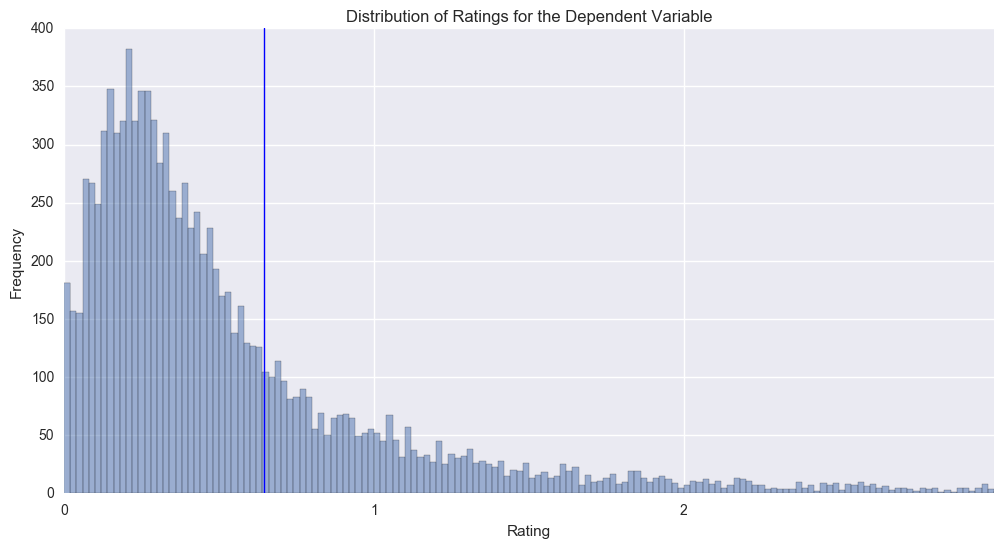

In [13]:
dependent_var = 'popularity'

graph_dependent_variable_data(main_df, dependent_var, 0, 3, .02)


<h3>Analysis of Results:</h3>
* The above graph shows that this dependent variable would not work well with this project because it has a clearly positive skew and therefore would not be appropriate to evaluate using a method that is meant for a normal distribution

<h3>Finally: The Rubric Summary</h3>

#### Code Functionality
* _Does the code work?_ <br>Yes. All code is functional and produces no errors when run
* _Does the project use NumPy and Pandas appropriately?_ <br>The project utilizes Pandas dataframes and vectorized operations where deemed appropriate, though it is worth noting that the data is filtered from an initial dataframe into a dictionary of lists before being converted back into a new Dataframe, and this method was chosen because there was a significant improvement in processing speed after realizing that the crux of this project is literally the creation of a dictionary of words where each word's value is a list of numbers
* _Does the project use good coding practices?_ <br> Functions are used throughout most of the project in order to make it portable enough that the code can be easily modified to fit any independent variable or dependent variable (or even any database), including helpful comments and variable names 

#### Quality of Analysis:
* _Is a question clearly posed?_ <br>Yes, at the very beginning of this project

#### Data Wrangling Phase
* _Is the data cleaning well documented?_ <br>Yes, there is a data cleaning section as soon as the dependent variable and independent variable are declared, and additional cleaning can easily be added in the event that a new variable requires it

#### Exploration Phase
* _Is the data explored in many ways?_ <br>The project first briefly explores a single dependent variable ('vote_average'), then dives into analyzing the relationship between that dependent variable and an independent variable ('overview'), and then continues to explore the relationship between the dependent variable and three other independent variables, before finally examining a different single dependent variable ('popularity') 
* _Are there a variety of relevant visualizations and statistical summaries?_ <br>There are not only Matplotlib graphs but also interactive Plotly graphs, and relevant statistics are cited throughout 

#### Conclusions Phase
* _Has the student correctly communicated tentativeness of findings?_ <br>In no way does this project imply any sort of causation between the variables

#### Communication
* _Is the flow of the analysis easy to follow?_ <br>The goal of this project is not only to address the central question but also to present an analysis that is clear, accessible, and downright fun
* _Is the data visualized using appropriate plots and parameter choices?_ <br>A great deal of care and consideration went into the choice of visualizations and their respective parameters 

#### Extras
* _Use Markdown cells to report your findings_ <br>Markdown cells are used throughout, including MathJax
* _Utilize NumPy or Pandas functionality that goes beyond what was covered in the course_ <br>Quite a bit of additional research was required in order to execute this analysis 
* _Use statistical tests to draw rigorous conclusions where appropriate._ <br>The essence of this project and its central question is the use of testing sampling distributions in order find statistically significant results


<h3>Hope you enjoyed, and thank you for your time!</h3>